**1.Importing the dependencies**

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2.Data Loading and Understanding**

In [292]:
# Load the csv data into pandas data frame
df = pd.read_csv("/content/Telco_customer_churn.csv")

In [293]:
df.shape

(7043, 24)

In [294]:
df.head()

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [295]:
pd.set_option('display.max_columns', None)

In [296]:
df.head()

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [298]:
# Also we can drop customer_id column, City and Churn reason columns since they are not important for model creation
df= df.drop(columns=['CustomerID'])

In [299]:
df= df.drop(columns=['Churn Reason'])

In [300]:
df= df.drop(columns=['City'])

In [301]:
df.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [302]:
# printing all the unique values in each columns to understand the categorical columns
not_categorical_column_list=['Tenure Months','Monthly Charges','Total Charges' ]
for col in df.columns:
  if col not in not_categorical_column_list:
    print(col, df[col].unique())
    print('-'*50)

Gender ['Male' 'Female']
--------------------------------------------------
Senior Citizen ['No' 'Yes']
--------------------------------------------------
Partner ['No' 'Yes']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
Phone Service ['Yes' 'No']
--------------------------------------------------
Multiple Lines ['No' 'Yes' 'No phone service']
--------------------------------------------------
Internet Service ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Online Security ['Yes' 'No' 'No internet service']
--------------------------------------------------
Online Backup ['Yes' 'No' 'No internet service']
--------------------------------------------------
Device Protection ['No' 'Yes' 'No internet service']
--------------------------------------------------
Tech Support ['No' 'Yes' 'No internet service']
--------------------------------------------------
Streaming TV ['No' 'Ye

In [303]:
# Check if there is any null values present
print(df.isnull().sum())

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
dtype: int64


In [304]:
# Here in info, we can see the monthly charges are in object, we have to convert this into float
#df['Total Charges'] = df['Total Charges'].astype(float)

In [305]:
# while running the above code it says there are some missing values in Total Charges columns which are denoted as " ". So we have to check how many and convert it accordingly
df[df['Total Charges'] == ' ']

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0


In [306]:
len(df[df['Total Charges'] == ' '])

11

In [307]:
# Now here we are converting all the " " into 0.0
for i in range(len(df)):
  if df.loc[i,'Total Charges'] == ' ':
    df.loc[i,'Total Charges'] = 0.0


In [308]:
#Now convert the Total Charges column into float datatype
df['Total Charges'] = df['Total Charges'].astype(float)

In [309]:
#check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [310]:
#Checking the class distribution of the target column which is Churn Value
print(df['Churn Value'].value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


**Insights**
1. We removed the Customer_id,City and Churn Reason as it is not required for modelling
2. No Missing values in the dataset
3. Missing values in the Total Charges column Handled properly
4. Class imbalance identified in the target

**3. Exploratary Data Analysis (EDA)**

In [311]:
df.shape

(7043, 21)

In [312]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value'],
      dtype='object')

In [313]:
df.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [314]:
df.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


**Histogram for numerical features**

In [315]:
# Here we are creating a function to plot histograms so that we dont have to repeat the code
def plot_histogram(df,column_name):

  plt.figure(figsize=(5,3))
  sns.histplot(data=df,x=column_name,kde=True)
  plt.title(f"Distribution of {column_name}")

  #calculate the mean and median for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
  plt.axvline(col_median,color='green',linestyle='-',label='Median')

  plt.legend()

  plt.show()

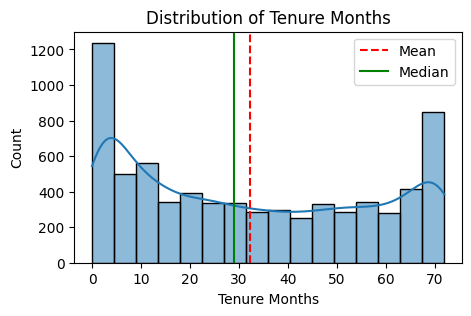

In [316]:
plot_histogram(df, "Tenure Months")

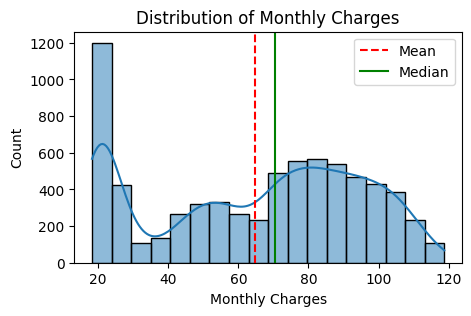

In [317]:
plot_histogram(df, "Monthly Charges")


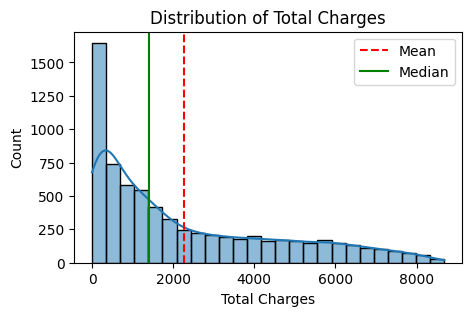

In [318]:
plot_histogram(df, "Total Charges")


**Box plot for numerical features**

In [319]:
# Create a function
def plot_boxplot(df,column_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.ylabel(column_name)

  plt.show()

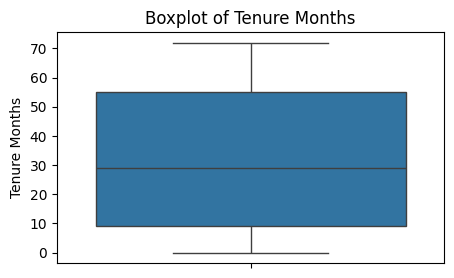

In [320]:
plot_boxplot(df,"Tenure Months")

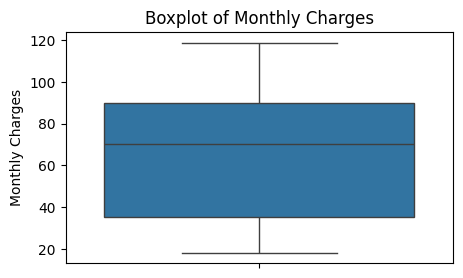

In [321]:
plot_boxplot(df,"Monthly Charges")

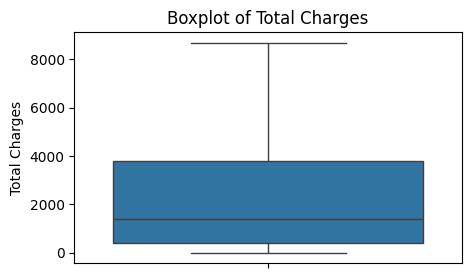

In [322]:
plot_boxplot(df,"Total Charges")

Here we did the analysis part to find the outliers, and we concluded that there are no outliers present


**Correlation Heatmap for numerical features**

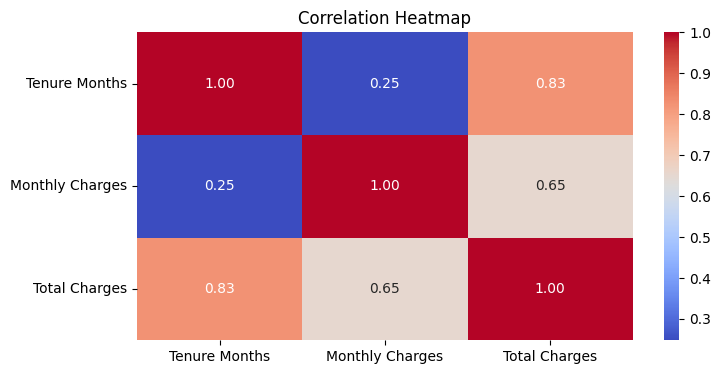

In [323]:
# correlation matrix - heatmap\
plt.figure(figsize=(8,4))
sns.heatmap(df[["Tenure Months","Monthly Charges","Total Charges"]].corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

So here we can find higher correlation between Tenure months and Total charges

**Categorical Feature Analysis**

In [324]:
# We are making a list of columns which are categorical
object_cols= df.select_dtypes(include="object").columns.to_list()
object_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label']

**Count Plot for categorical features**

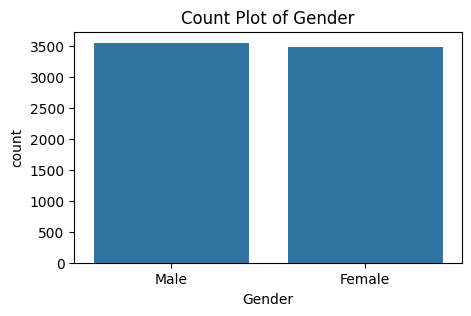

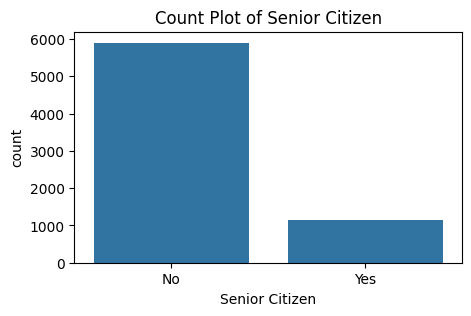

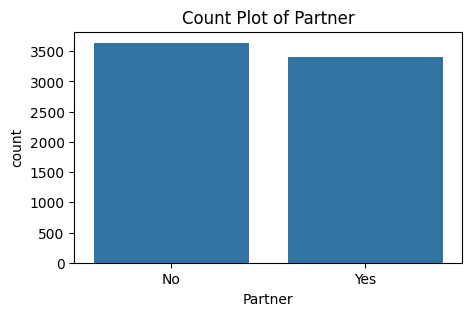

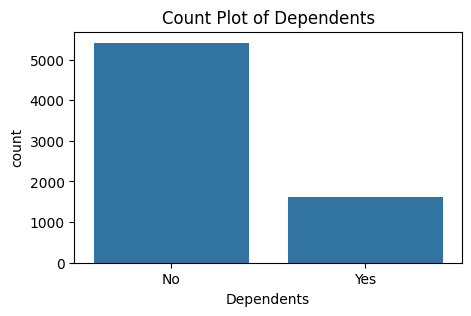

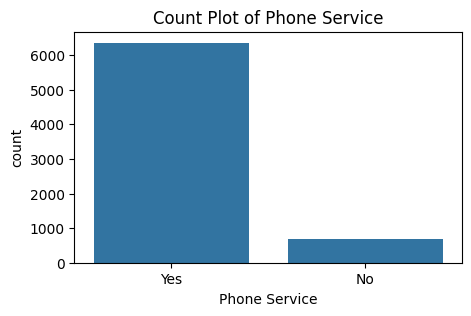

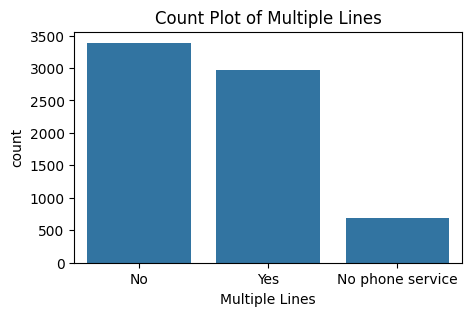

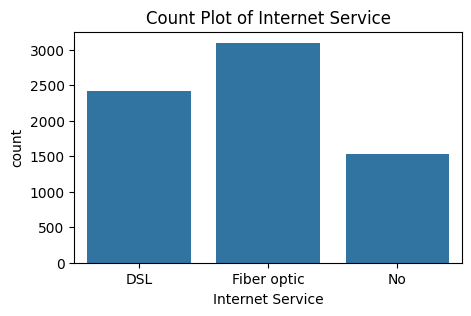

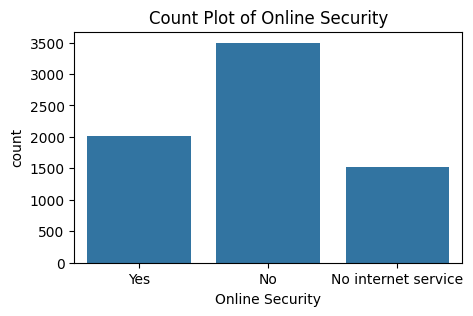

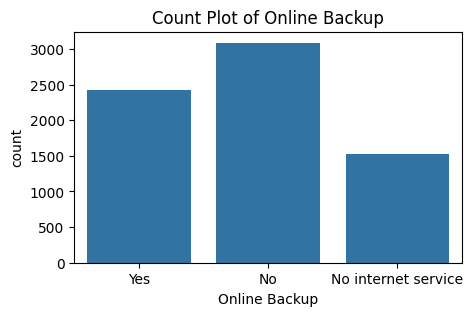

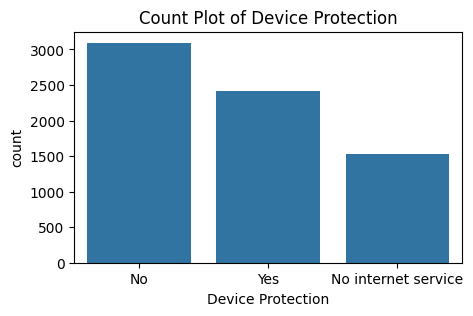

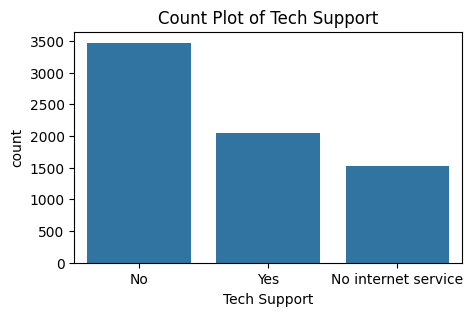

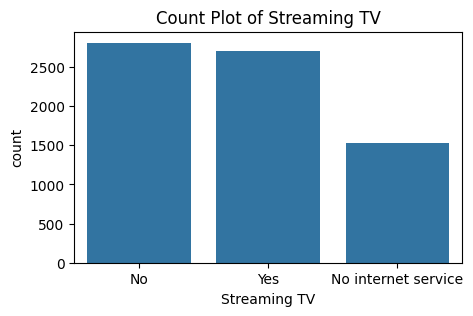

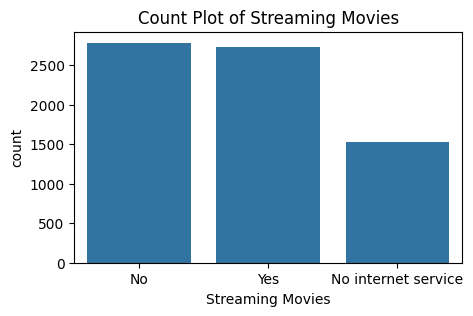

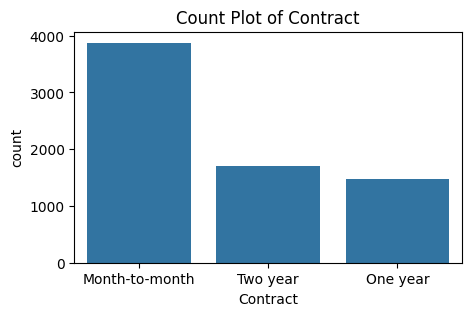

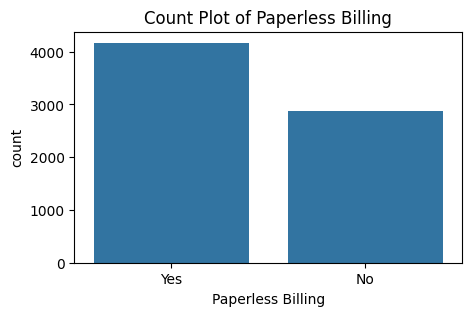

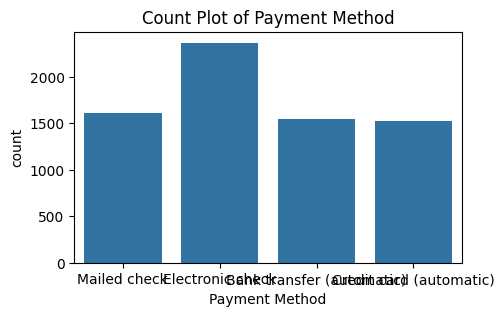

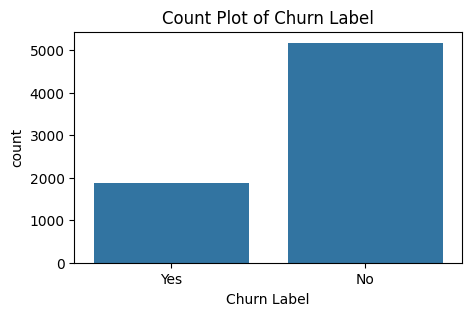

In [325]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

From these plots we analyzed that count of each label in categorical columns are not equal.
Since our target column, which is Churn label/Churn Value is having a huge variation, we have to preprocess the data before modelling


**4. Data preprocessing**

Here, we dont have any outliers or missing values, we are going to other preprocessing tasks


Since we have already a Churn Value column in our dataset, we dont have to replace churn label column into churn value.

In [326]:
# The columns with object datatypes
print(object_cols)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


In [327]:
# Now we have to convert all these columns into numerical encoders, like 0,1,2 etc
# Before doing the encoding, we have to keep all the encoders in a dictionary so that we can use the dictionary for encoding when its needed in future

encoders={}

# apply label encoding and store the encoders
for column in object_cols:
  label_encoder= LabelEncoder()
  df[column]= label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

# save the encoders to a pickle file without the Churn label

with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)


In [328]:
encoders

{'Gender': LabelEncoder(),
 'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder(),
 'Churn Label': LabelEncoder()}

In [329]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1,1
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1,1


In [330]:
# Since Churn value and Churn Label are duplicates now, remove one
df= df.drop(columns=['Churn Value'])

Since our target column is biased, we have to rectify that, we will use SMOTE for this.
But before that we are going to split our data into training and test data



**Training and Test data split**

In [331]:
#Splitting the features and target columns
x=df.drop(columns=['Churn Label'])
y=df['Churn Label']

In [332]:
# split training and test data in 4:1 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#

In [333]:
print(y_train.value_counts())

Churn Label
0    4165
1    1469
Name: count, dtype: int64


Here in the y_train table(Target table) also having a biase towards 0 (Yes), so we have to rectify this using **SMOTE**
**(Synthetic Minority Oversamling TEchnique)**

In [334]:
smote= SMOTE(random_state=42)
x_train_smote,y_train_smote= smote.fit_resample(x_train,y_train)

In [335]:
print(y_train_smote.value_counts())

Churn Label
0    4165
1    4165
Name: count, dtype: int64


Now we have done all the preprocessing part before model training

**5.Model Training**

We are going to make Three models
- Decision tree
- Random forest
- XGBoost

In [336]:
# Creating a dictionary of models
models= {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


Here we are doing cross validation to get more accurate models


In [337]:
# Dictionary to store cross validation results
cv_scores={}

# Perform 5 fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name}")
  scores= cross_val_score(model,x_train_smote,y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross validation accuracy:{np.mean(scores):.2f}")
  print("-"*60)

Training Decision Tree
Decision Tree cross validation accuracy:0.80
------------------------------------------------------------
Training Random Forest
Random Forest cross validation accuracy:0.85
------------------------------------------------------------
Training XGBoost
XGBoost cross validation accuracy:0.83
------------------------------------------------------------


In [338]:
cv_scores

{'Decision Tree': array([0.70768307, 0.74789916, 0.85534214, 0.84633854, 0.82653061]),
 'Random Forest': array([0.75570228, 0.78331333, 0.89555822, 0.89555822, 0.9057623 ]),
 'XGBoost': array([0.71788715, 0.76710684, 0.89195678, 0.88955582, 0.89615846])}

All the models are giving the same accuracy which is 1, But going with random Forest Model


In [339]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

**6. Model Evaluation**

In [340]:
# Evaluate on test data
y_test_pred= rfc.predict(x_test)
print("Accuracy score:\n", accuracy_score(y_test,y_test_pred))
print("-"*50)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))
print("-"*50)
print("Classification Report:\n", classification_report(y_test,y_test_pred))

Accuracy score:
 0.7885024840312278
--------------------------------------------------
Confusion Matrix:
 [[860 149]
 [149 251]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1009
           1       0.63      0.63      0.63       400

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



In [341]:
# Save the trained model as a pickle file
model_data={"model":rfc,"feature_name":x.columns.to_list()}

with open("rfc_customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

**7. Load the saved model and Build a predictive system**

In [342]:
# Load the saved model and the features

with open("rfc_customer_churn_model.pkl","rb") as f:
  model_data= pickle.load(f)

  loaded_model= model_data["model"]
  feature_names= model_data["feature_name"]

In [343]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [344]:
print(feature_names)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   int64  
 7   Internet Service   7043 non-null   int64  
 8   Online Security    7043 non-null   int64  
 9   Online Backup      7043 non-null   int64  
 10  Device Protection  7043 non-null   int64  
 11  Tech Support       7043 non-null   int64  
 12  Streaming TV       7043 non-null   int64  
 13  Streaming Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

In [356]:
input_data= {'Gender': 'Male',
 'Senior Citizen': 'No',
 'Partner': 'No',
 'Dependents': 'No',
 'Tenure Months': '2',
 'Phone Service': 'Yes',
 'Multiple Lines': 'No',
 'Internet Service': 'DSL',
 'Online Security': 'Yes',
 'Online Backup': 'Yes',
 'Device Protection': 'No',
 'Tech Support': 'No',
 'Streaming TV': 'No',
 'Streaming Movies': 'No',
 'Contract': 'Month-to-month',
 'Paperless Billing': 'Yes',
 'Payment Method': 'Mailed check',
 'Monthly Charges': '53.85',
 'Total Charges': '108.15'
  }
input_data_df= pd.DataFrame([input_data])





In [357]:
with open("encoders.pkl","rb") as f:
  encoders= pickle.load(f)

# drop the Churn label key from the dictionary
encoders.pop("Churn Label")

LabelEncoder()

In [358]:
# encode categorical features using the saved encoders
for column,encoder in encoders.items():
  input_data_df[column]= encoder.transform(input_data_df[column])

In [359]:
encoders


{'Gender': LabelEncoder(),
 'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder()}

In [360]:
print(input_data_df)

   Gender  Senior Citizen  Partner  Dependents Tenure Months  Phone Service  \
0       1               0        0           0             2              1   

   Multiple Lines  Internet Service  Online Security  Online Backup  \
0               0                 0                2              2   

   Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract  \
0                  0             0             0                 0         0   

   Paperless Billing  Payment Method Monthly Charges Total Charges  
0                  1               3           53.85        108.15  


In [362]:
# Make a prediction
prediction= loaded_model.predict(input_data_df)
predict_prob= loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"Prediction :{'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Prediction Probability:{predict_prob}")

[1]
Prediction :Churn
Prediction Probability:[[0.14 0.86]]


So, here we predicted the outcome of a raw data, and it was selected from our dataset only(The first row), and it predicts correctly.